<a href="https://colab.research.google.com/github/suppi96/Research-Project/blob/main/Research_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 87.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 122.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 119.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 85.8 MB/s eta 0:00:00
   ━

# Setting up the project

The code below includes the import statements within the project, as well as uploading the file with the datset needed to perform the classification. Following this, it also displays some basic informtion about the dataset as well.

In [9]:
import pandas as pd
from pycaret.classification import *
from google.colab import files

# uploading dataset
uploaded = files.upload()

# Specifying the file path
file_path = '/mnt/data/kr-vs-kp.data'

# Defining the column names based on dataset
column_names = [
    'white_king_col', 'white_king_row', 'white_queen_col', 'white_queen_row',
    'black_king_col', 'black_king_row', 'result'

]

# Loading the dataset

data = pd.read_csv(file_path, names=column_names, header=None)

# Resetting index

data.reset_index(drop=True, inplace=True)

# Display the information of the dataset
print("Dataset Preview:")
print(data.head())
print("\nClass Distribution:")
print(data['result'].value_counts())

Saving kr-vs-kp.data to kr-vs-kp (1).data
Dataset Preview:
  white_king_col white_king_row white_queen_col white_queen_row  \
0              f              f               f               t   
1              f              f               f               t   
2              f              f               f               t   
3              f              f               f               t   
4              f              f               f               t   

  black_king_col black_king_row result  
0              t              n    won  
1              t              n    won  
2              t              n    won  
3              t              n    won  
4              t              n    won  

Class Distribution:
result
won      1669
nowin    1527
Name: count, dtype: int64


# Setting up PyCaret

The conversions you see below are due to type errors that kept persisting.

In [17]:
from pycaret.classification import *
# Convert columns to correct data types
data['white_king_col'] = data['white_king_col'].astype('category')
data['white_queen_col'] = data['white_queen_col'].astype('category')
data['black_king_col'] = data['black_king_col'].astype('category')


data['white_king_row'] = pd.to_numeric(data['white_king_row'], errors='coerce')
data['white_queen_row'] = pd.to_numeric(data['white_queen_row'], errors='coerce')
data['black_king_row'] = pd.to_numeric(data['black_king_row'], errors='coerce')

# Set up PyCaret
clf_setup = setup(
    data=data,
    target='result',
    session_id=123,
    categorical_features=['white_king_col', 'white_queen_col', 'black_king_col'],
    numeric_features=['white_king_row', 'white_queen_row', 'black_king_row'],
    ignore_features=[],  # make sure to not ignore any features
    categorical_imputation='mode',  # Use 'mode' strategy for categorical columns
    numeric_imputation='mean',     # Use 'mean' strategy for numeric columns
)

,Description,Value
0,Session id,123
1,Target,result
2,Target type,Binary
3,Target mapping,"nowin: 0, won: 1"
4,Original data shape,"(3196, 7)"
5,Transformed data shape,"(3196, 4)"
6,Transformed train set shape,"(2237, 4)"
7,Transformed test set shape,"(959, 4)"
8,Numeric features,3
9,Categorical features,3


# Comparing and Evaluating Models

In [18]:
best_model = compare_models()

evaluate_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7197,0.7499,0.7197,0.7200,0.7194,0.4379,0.4384,0.4530
nb,Naive Bayes,0.7197,0.7499,0.7197,0.7200,0.7194,0.4379,0.4384,0.0530
dt,Decision Tree Classifier,0.7197,0.7531,0.7197,0.7200,0.7194,0.4379,0.4384,0.0560
svm,SVM - Linear Kernel,0.7197,0.7496,0.7197,0.7200,0.7194,0.4379,0.4384,0.0580
ridge,Ridge Classifier,0.7197,0.7499,0.7197,0.7200,0.7194,0.4379,0.4384,0.0660
rf,Random Forest Classifier,0.7197,0.7531,0.7197,0.7200,0.7194,0.4379,0.4384,0.3170
qda,Quadratic Discriminant Analysis,0.7197,0.7465,0.7197,0.7200,0.7194,0.4379,0.4384,0.0570
ada,Ada Boost Classifier,0.7197,0.7499,0.7197,0.7200,0.7194,0.4379,0.4384,0.1240
gbc,Gradient Boosting Classifier,0.7197,0.7531,0.7197,0.7200,0.7194,0.4379,0.4384,0.1400
lda,Linear Discriminant Analysis,0.7197,0.7499,0.7197,0.7200,0.7194,0.4379,0.4384,0.0530


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Visualization: Feature Importance

Here we had to use a Random Forest model to plot the feature importance, as the best model did not support feature importance (e.g, the code plot_model(best_model, plot='feature) was not working)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7589,0.7869,0.7589,0.7588,0.7588,0.5165,0.5166
1,0.7500,0.7921,0.7500,0.7501,0.7495,0.4978,0.4985
2,0.7366,0.7816,0.7366,0.7365,0.7364,0.4715,0.4717
3,0.7902,0.8188,0.7902,0.7903,0.7899,0.5787,0.5793
4,0.7098,0.7543,0.7098,0.7097,0.7098,0.4183,0.4183
5,0.6607,0.6820,0.6607,0.6610,0.6608,0.3206,0.3207
6,0.7188,0.7587,0.7188,0.7197,0.7189,0.4375,0.4379
7,0.6996,0.7324,0.6996,0.7006,0.6997,0.3990,0.3994
8,0.6906,0.7123,0.6906,0.6917,0.6888,0.3772,0.3798


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

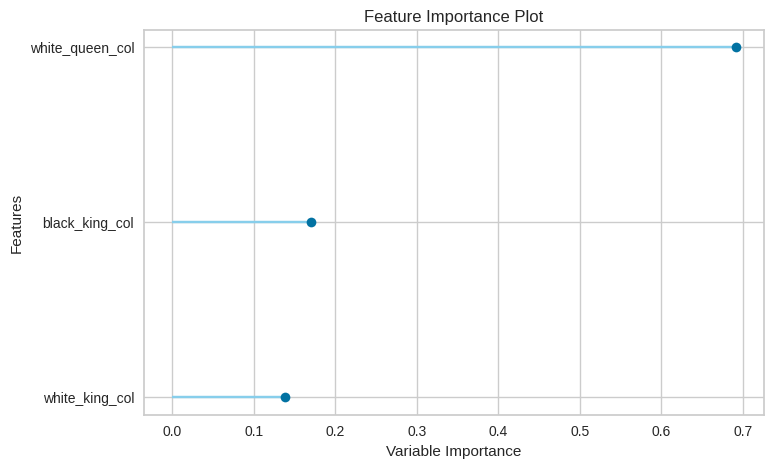

In [21]:
rf_model = create_model('rf')  # Create a Random Forest model

# Finalize the Random Forest model
final_rf = finalize_model(rf_model)

# Plot feature importance
plot_model(final_rf, plot='feature')

# Visualization: Error Prediction

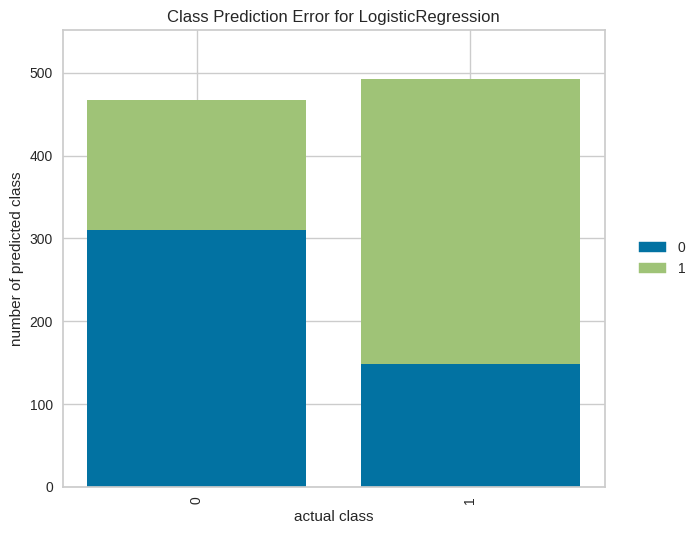

In [22]:
plot_model(best_model, plot='error')

# Finalizing the Model

In [23]:
final_model = finalize_model(best_model)
save_model(final_model, '/mnt/data/best_classification_model')
loaded_model = load_model('/mnt/data/best_classification_model')

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded


# Predictions

In [24]:
predictions = predict_model(loaded_model)

print("\Sample Predictions:")
print(predictions.head())

output_file = '/mnt/data/predictions.csv'
predictions.to_csv(output_file, index=False)
print(f"\nPredictions saved to {output_file}")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.6820,0.7156,0.6820,0.6823,0.6821,0.3632,0.3632


\Sample Predictions:
     white_king_col  white_king_row white_queen_col  white_queen_row  \
155               f             NaN               f              NaN   
3124              f             NaN               t              NaN   
1800              t             NaN               f              NaN   
1441              f             NaN               f              NaN   
663               f             NaN               f              NaN   

     black_king_col  black_king_row result prediction_label  prediction_score  
155               f             NaN    won            nowin            0.6089  
3124              t             NaN  nowin            nowin            0.7088  
1800              f             NaN    won              won            0.7437  
1441              t             NaN  nowin              won            0.6960  
663               t             NaN    won              won            0.6960  

Predictions saved to /mnt/data/predictions.csv
